### 导入模块（WY）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

### 初始化sympy的打印系统

In [2]:
sympy.init_printing()

### 使用SymPy及其dsolve函数来解决简单常见的常微分方程

### 举例一：牛顿冷却定律的简单一阶常微分方程 

In [3]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")   #定义变量和符号

In [4]:
T = sympy.Function("T")

In [5]:
ode = T(t).diff(t) + k*(T(t) - Ta)

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sympy\core\relational.py:490: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


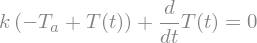

In [6]:
sympy.Eq(ode)    #函数表达式

In [7]:
ode_sol = sympy.dsolve(ode)   #将其传递给sympy.dsolve，自动找到该常微分方程的通解。

In [8]:
ode_sol  #通解

In [9]:
ode_sol.lhs    #通解等式左侧

In [10]:
ode_sol.rhs   #通解等式右侧

In [11]:
ics = {T(0): T0}    #给定一个特解求系数

In [12]:
ics

In [13]:
C_eq = ode_sol.subs(t, 0).subs(ics)

In [14]:
C_eq

In [15]:
C_sol = sympy.solve(C_eq)

In [16]:
C_sol

In [17]:
ode_sol.subs(C_sol[0])    #最后求出的解

In [18]:
#把以上求解一阶常微分方程的步骤概括为任意阶的微分方程
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
    to the solution of the ODE with independent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)) 
    .subs(x, 0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [19]:
ode_sol   

In [20]:
apply_ics(ode_sol, ics, t, [k, Ta])   #用以上方法求出的通解

In [21]:
t, omega0, gamma= sympy.symbols("t, omega_0, gamma", 
positive=True)

In [22]:
x = sympy.Function("x")

In [23]:
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)

### 二阶常微分方程

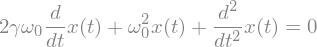

In [24]:
sympy.Eq(ode)  #二阶常微分方程

In [25]:
ode_sol = sympy.dsolve(ode)

In [26]:
ode_sol

In [27]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

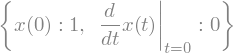

In [28]:
ics

In [29]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])

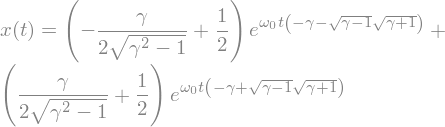

In [30]:
x_t_sol    #通解

In [31]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)

In [32]:
x_t_critical

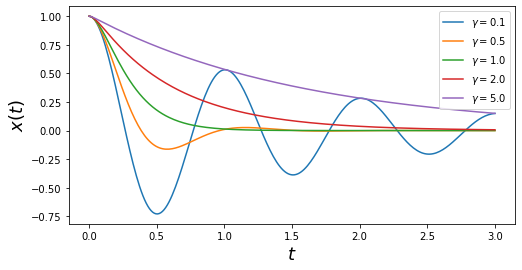

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0,gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()

In [34]:
x = sympy.symbols("x")

In [35]:
y = sympy.Function("y")

In [36]:
f = y(x)**2 + x

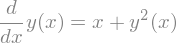

In [37]:
sympy.Eq(y(x).diff(x), f)

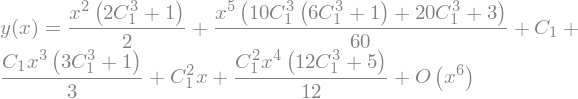

In [38]:
sympy.dsolve(y(x).diff(x) - f)

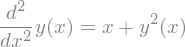

In [39]:
sympy.Eq(y(x).diff(x, x), f)

In [40]:
sympy.dsolve(y(x).diff(x, x) - f)

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

In [41]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                fontsize=18)
    return ax

In [42]:
x = sympy.symbols("x")

In [43]:
y = sympy.Function("y")

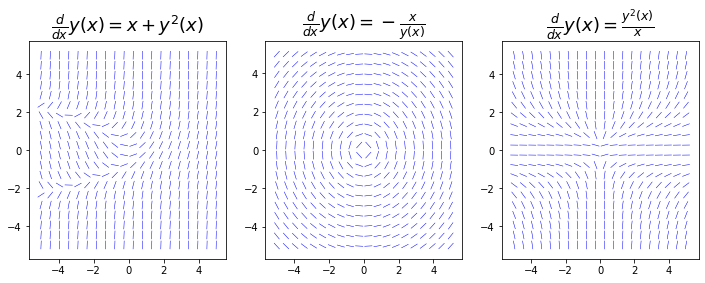

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

In [45]:
x = sympy.symbols("x")

In [46]:
y = sympy.Function("y")

In [47]:
f = y(x)**2 + x

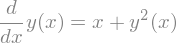

In [48]:
sympy.Eq(y(x).diff(x), f)

In [49]:
ics = {y(0): 0}

In [50]:
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)

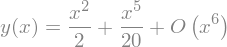

In [51]:
ode_sol

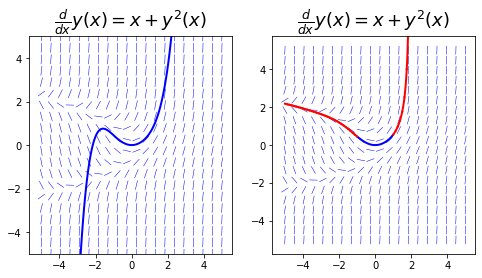

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# left panel
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
# iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
# positive x
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())
    (x_vec), 'r', lw=2)
# negative x
for x0 in np.arange(-1, -5, -dx):
    x_vec = np.linspace(x0, x0 - dx, 100)
    ics = {y(x0): ode_sol_m.rhs.removeO().subs(x, x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())
    (x_vec), 'r', lw=2)

### 用拉普拉斯变换求解常微分方程

In [53]:
t = sympy.symbols("t", positive=True)

In [54]:
y = sympy.Function("y")

In [55]:
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)

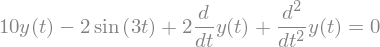

In [56]:
sympy.Eq(ode)

In [57]:
s, Y = sympy.symbols("s, Y", real=True)

In [58]:
L_y = sympy.laplace_transform(y(t), t, s)

In [59]:
L_y

In [60]:
 L_ode = sympy.laplace_transform(ode, t, s, noconds=True)

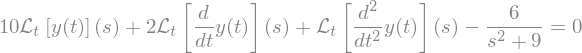

In [61]:
sympy.Eq(L_ode)

In [62]:
def laplace_transform_derivatives(e):
    """
    Evaluate laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) -
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).
                    subs(t, 0) for i in range(1, n+1)]))

    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in 
        e.args])

    return e

In [63]:
L_ode_2 = laplace_transform_derivatives(L_ode)

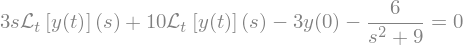

In [64]:
sympy.Eq(L_ode_2)

In [65]:
L_ode_3 = L_ode_2.subs(L_y, Y)

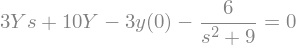

In [66]:
sympy.Eq(L_ode_3)

In [67]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}

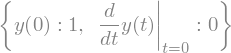

In [68]:
ics

In [69]:
L_ode_4 = L_ode_3.subs(ics)

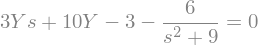

In [70]:
sympy.Eq(L_ode_4)

In [71]:
Y_sol = sympy.solve(L_ode_4, Y)

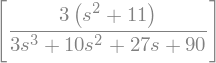

In [72]:
Y_sol

In [73]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)

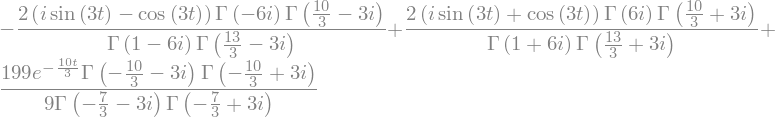

In [74]:
sympy.simplify(y_sol)

# 利用SciPy对ode进行数值积分（LCH）

In [75]:
x = sympy.symbols("x")

In [76]:
y = sympy.Function("y")

In [77]:
f = y(x)**2 + x

In [78]:
f_np = sympy.lambdify((y(x), x), f)

In [79]:
y0 = 0

In [80]:
xp = np.linspace(0, 1.9, 100)

In [81]:
yp = integrate.odeint(f_np, y0, xp)

In [82]:
xm = np.linspace(0, -5, 100)

In [83]:
ym = integrate.odeint(f_np, y0, xm)

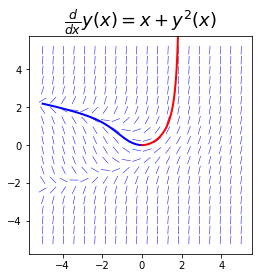

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

In [85]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7

In [86]:
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

In [87]:
xy0 = [600, 400]

In [88]:
t = np.linspace(0, 50, 250)

In [89]:
xy_t = integrate.odeint(f, xy0, t)

In [90]:
xy_t.shape

Text(0, 0.5, 'Number of predators')

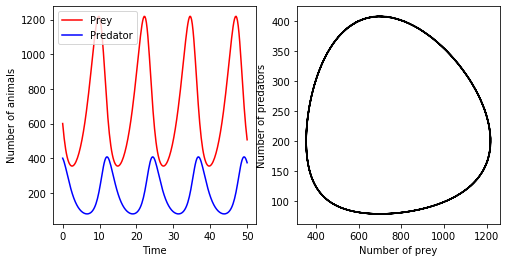

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")

In [92]:
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z]

In [93]:
sigma, rho, beta = 8, 28, 8/3.0

In [94]:
t = np.linspace(0, 25, 10000)

In [95]:
xyz0 = [1.0, 1.0, 1.0]

In [96]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))

In [97]:
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))

In [98]:
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

In [99]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

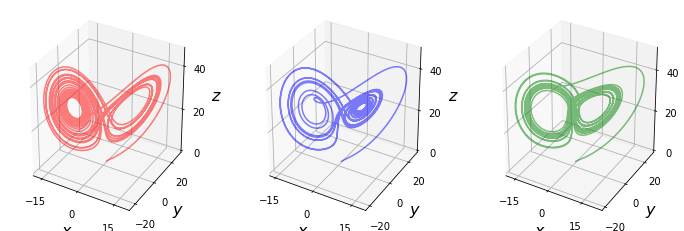

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),
                                  subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), 
(ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])